In [2]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [25]:
with open('data/mlp_fourier.json', 'r') as f:
    mlp_fourier = json.load(f)
    mlp_fourier_loss = mlp_fourier.get('train_loss', [])
    mlp_fourier_val_loss = mlp_fourier.get('val_loss', [])

with open('data/mlp_nofourier.json', 'r') as f:
    mlp_no_fourier = json.load(f)
    mlp_no_fourier_loss = mlp_no_fourier.get('train_loss', [])
    mlp_no_fourier_val_loss = mlp_no_fourier.get('val_loss', [])

with open('data/transformer_fourier.json', 'r') as f:
    transformer_fourier = json.load(f)
    transformer_fourier_loss = transformer_fourier.get('train_loss', [])
    transformer_fourier_val_loss = transformer_fourier.get('val_loss', [])

with open('data/transformer_nofourier.json', 'r') as f:
    transformer_no_fourier = json.load(f)
    transformer_no_fourier_loss = transformer_no_fourier.get('train_loss', [])
    transformer_no_fourier_val_loss = transformer_no_fourier.get('val_loss', [])

with open('data/mlp_config2.json', 'r') as f:
    mlp_fourier_config2 = json.load(f)
    mlp_fourier_config2_loss = mlp_fourier_config2.get('train_loss', [])
    mlp_fourier_config2_val_loss = mlp_fourier_config2.get('val_loss', [])

with open('data/transformer_config2.json', 'r') as f:
    transformer_fourier_config2 = json.load(f)
    transformer_fourier_config2_loss = transformer_fourier_config2.get('train_loss', [])
    transformer_fourier_config2_val_loss = transformer_fourier_config2.get('val_loss', [])

with open('data/mlp_local.json', 'r') as f:
    mlp_local = json.load(f)
    mlp_local_loss = mlp_local.get('train_loss', [])
    mlp_local_val_loss = mlp_local.get('val_loss', [])

In [4]:
train_loss = {
    "mlp_fourier": mlp_fourier_loss,
    "mlp_no_fourier": mlp_no_fourier_loss,
    "transformer_fourier": transformer_fourier_loss,
    "transformer_no_fourier": transformer_no_fourier_loss
}
val_loss = {
    "mlp_fourier": mlp_fourier_val_loss,
    "mlp_no_fourier": mlp_no_fourier_val_loss,
    "transformer_fourier": transformer_fourier_val_loss,
    "transformer_no_fourier": transformer_no_fourier_val_loss
}

In [21]:
train_loss = {
    "mlp_8downsample": mlp_fourier_loss,
    "mlp_4downsample": mlp_fourier_config2_loss,
    "transformer_8downsample": transformer_fourier_loss,
    "transformer_4downsample": transformer_fourier_config2_loss
}
val_loss = {
    "mlp_8downsample": mlp_fourier_val_loss,
    "mlp_4downsample": mlp_fourier_config2_val_loss,
    "transformer_8downsample": transformer_fourier_val_loss,
    "transformer_4downsample": transformer_fourier_config2_val_loss
}

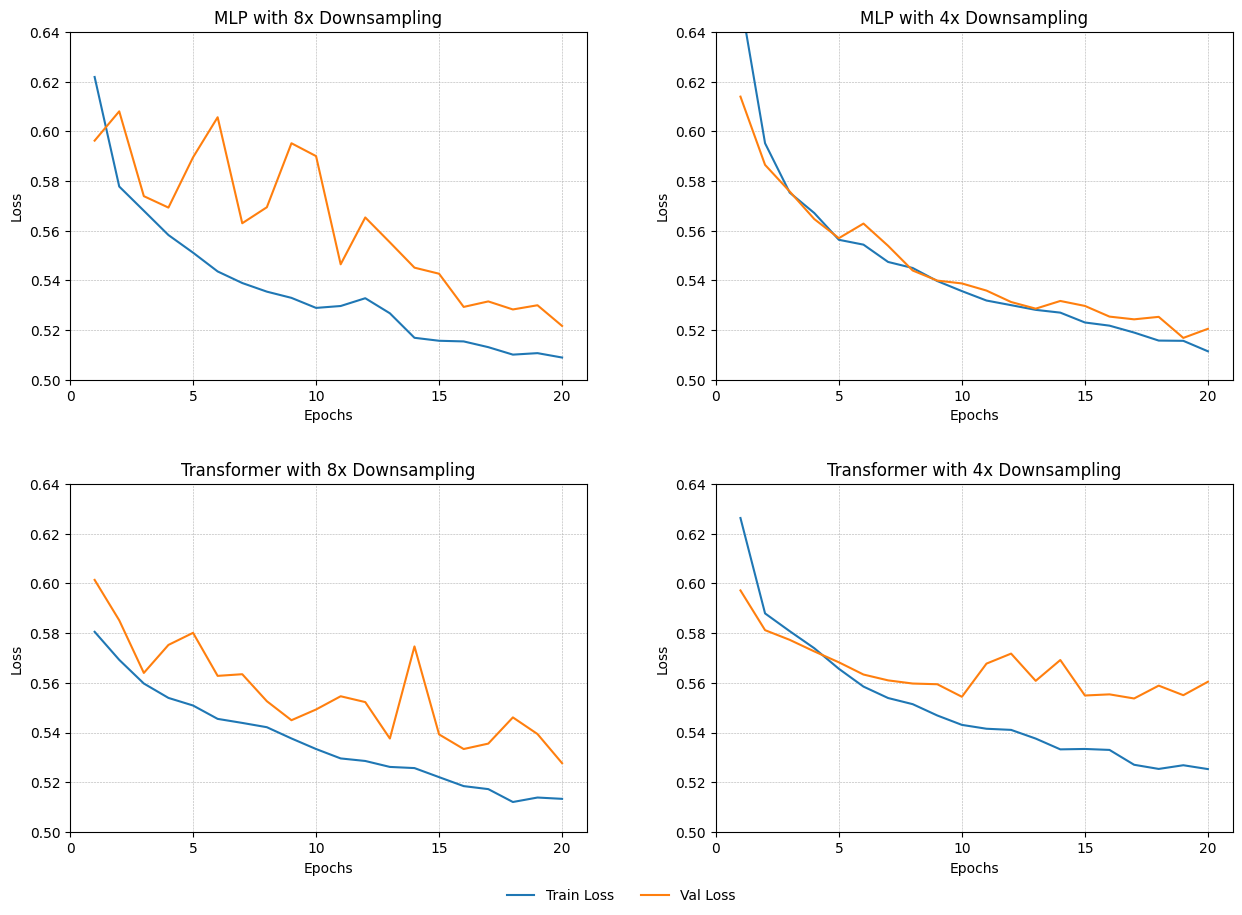

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
num_epochs = len(train_loss['mlp_8downsample'])
epochs_x = np.arange(1, num_epochs + 1)

# Helper function to apply common styling
def style_ax(ax, title):
    ax.set_title(title)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5)) # Every 5 epochs
    ax.grid(True, linestyle='--', linewidth=0.4)           # Dotted thin grid
    ax.set_ylim(0.5, 0.64)                                # Slim Y-range
    ax.set_xlim(0, 21)                                    # X-range (adjust as needed)

# --- Plot 1 ---
axs[0, 0].plot(epochs_x, train_loss['mlp_8downsample'], label='Train Loss')
axs[0, 0].plot(epochs_x, val_loss['mlp_8downsample'], label='Val Loss')
style_ax(axs[0, 0], 'MLP with 8x Downsampling')

# --- Plot 2 ---
axs[0, 1].plot(epochs_x, train_loss['mlp_4downsample'], label='Train Loss')
axs[0, 1].plot(epochs_x, val_loss['mlp_4downsample'], label='Val Loss')
style_ax(axs[0, 1], 'MLP with 4x Downsampling')

# --- Plot 3 ---
axs[1, 0].plot(epochs_x, train_loss['transformer_8downsample'], label='Train Loss')
axs[1, 0].plot(epochs_x, val_loss['transformer_8downsample'], label='Val Loss')
style_ax(axs[1, 0], 'Transformer with 8x Downsampling')

# --- Plot 4 ---
axs[1, 1].plot(epochs_x, train_loss['transformer_4downsample'], label='Train Loss')
axs[1, 1].plot(epochs_x, val_loss['transformer_4downsample'], label='Val Loss')
style_ax(axs[1, 1], 'Transformer with 4x Downsampling')

# 2. Global Legend
# Get handles and labels from the first plot (since they are all the same)
handles, labels = axs[0, 0].get_legend_handles_labels()
# Place legend at the bottom center
fig.legend(handles, labels, loc='lower center', ncol=2, fontsize=10, frameon=False)

# 3. Adjust Layout
# hspace/wspace: Adds spacing between subplots
# bottom: Lifts the plots up to make room for the legend
plt.subplots_adjust(hspace=0.3, wspace=0.25, bottom=0.08)
plt.savefig('training_validation_loss_comparison_2.png', dpi=300)

In [31]:
train_loss = {
    "mlp_no_local_pooling": mlp_fourier_config2_loss,
    "mlp_with_local_pooling": mlp_local_loss,
   
}
val_loss = {
    "mlp_no_local_pooling": mlp_fourier_config2_val_loss,
    "mlp_with_local_pooling": mlp_local_val_loss,
}

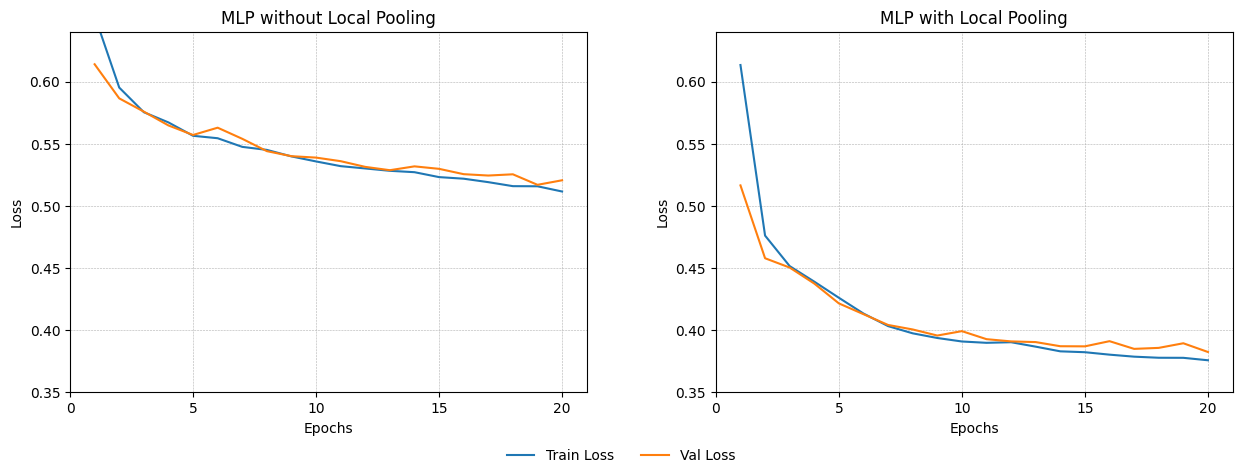

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
num_epochs = len(train_loss['mlp_no_local_pooling'])
epochs_x = np.arange(1, num_epochs + 1)

# Helper function to apply common styling
def style_ax(ax, title):
    ax.set_title(title)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5)) # Every 5 epochs
    ax.grid(True, linestyle='--', linewidth=0.4)           # Dotted thin grid
    ax.set_ylim(0.35, 0.64)                                # Slim Y-range
    ax.set_xlim(0, 21)                                    # X-range (adjust as needed)

# --- Plot 1 ---
axs[0].plot(epochs_x, train_loss['mlp_no_local_pooling'], label='Train Loss')
axs[0].plot(epochs_x, val_loss['mlp_no_local_pooling'], label='Val Loss')
style_ax(axs[0], 'MLP without Local Pooling')

# --- Plot 2 ---
axs[1].plot(epochs_x, train_loss['mlp_with_local_pooling'], label='Train Loss')
axs[1].plot(epochs_x, val_loss['mlp_with_local_pooling'], label='Val Loss')
style_ax(axs[1], 'MLP with Local Pooling')

# 2. Global Legend
# Get handles and labels from the first plot (since they are all the same)
handles, labels = axs[0].get_legend_handles_labels()
# Place legend at the bottom center
fig.legend(handles, labels, loc='lower center', ncol=2, fontsize=10, frameon=False)

# 3. Adjust Layout
# hspace/wspace: Adds spacing between subplots
# bottom: Lifts the plots up to make room for the legend
plt.subplots_adjust(hspace=0.3, wspace=0.25, bottom=0.16)
plt.savefig('training_validation_loss_comparison_final.png', dpi=300)
#plt.show()